## Introdução ao Keras
  Keras é um framework de aprendizado profundo para Python que fornece uma maneira conveniente de definir e treinar quase qualquer tipo de modelo de aprendizado profundo. Keras foi inicialmente desenvolvido para pesquisadores, com o objetivo de permitir uma experimentação rápida.

O Keras tem os seguintes recursos principais:
* Permite que o mesmo código seja executado perfeitamente na CPU ou GPU.
* Possui uma API amigável que facilita a criação rápida de protótipos de modelos de aprendizado profundo.
* Possui suporte integrado para redes convolucionais (para visão computacional), redes recorrentes (para processamento de sequência) e qualquer combinação de ambas.
* Suporta arquiteturas de rede arbitrárias: modelos de múltiplas entradas ou saídas, compartilhamento de camada, compartilhamento de modelo e assim por diante. Isso significa que Keras é apropriado para construir essencialmente qualquer modelo de aprendizado profundo, de uma rede adversária geradora  a uma máquina de Turing neural.

### Redes neurais usando o Keras
O modelo mais simples é definido na classe **Sequential**, que é uma sequencia linear de camadas. Você pode criar um modelo sequencial e definir todas as camadas no constructor do modelo. 

Exemplo: 

**from keras.models import Sequential**

**model = Sequential(...)**

**model.add(...)**

**model.add(...)**

**model.add(...)**

### Entrada do modelo


* A primeira camada em seu modelo deve especificar a forma da entrada.

* O número de atributos de entrada é definido pelo argumento input_dim. Este argumento espera um número inteiro.

* Por exemplo, você pode definir a entrada em termos de 8 entradas para uma camada de tipo **Dense** da seguinte maneira:

> >   Dense(16, input_dim=8)


* A camada **Dense** implementa a operação: saída = ativação(dot( (X, W) + W_0)) onde a ativação é a função de ativação elemento passada como o argumento de ativação, kernel é uma matriz de pesos criada pela camada e polarização é um vetor de polarização criado por a camada (aplicável apenas se use_bias for True).

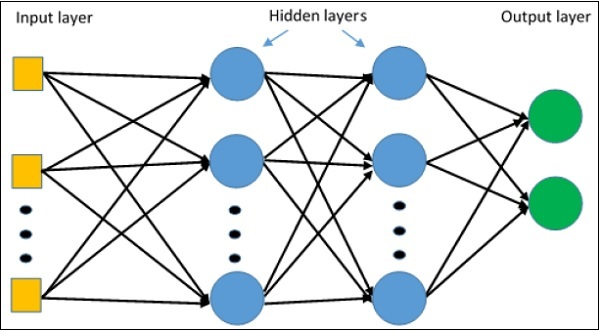

### Camadas do modelo

Camadas de tipos diferentes tem algumas propriedades em comum, especificamente seu método de inicialização de peso e funções de ativação. Para o modelo MLP são utilizadas camadas do tipo **Dense**.

#### Inicialização dos pesos

O tipo de inicialização usado para uma camada é especificado no argumento init.

Alguns tipos comuns de inicialização de camada incluem:

* “Uniforme“: Os pesos são inicializados para pequenos valores uniformemente aleatórios entre 0 e 0,05.
* “Normal“: Os pesos são inicializados para pequenos valores aleatórios Gaussianos (média zero e desvio padrão de 0,05).
* “Zero“: Todos os pesos são definidos com valores zero.

#### Funções de ativação 

Keras suporta uma gama de funções de ativação de neurônios padrão, como: softmax, ReLU tanh e sigmoid.

Normalmente, você especifica o tipo de função de ativação usada por uma camada no argumento de ativação, que recebe um valor de string. Por exemplo:

> > model.add(tf.keras.layers.Dense(32, activation='relu'))

Há um grande número de tipos de camadas principais para redes neurais padrão.

#### Outros tipos de camadas

Alguns tipos de camadas comuns e úteis que você pode escolher são:

* **Dense**: camada totalmente conectada e o tipo mais comum de camada usado em modelos perceptron multicamadas.
* **Dropout**: aplique o dropout ao modelo, definindo uma fração de entradas para zero em um esforço para reduzir o excesso de ajuste (*overfitting*).
* **Merge**: Combina as entradas de vários modelos em um único modelo.

##### Exemplo de construção de um modelo MLP com três camadas

> model = Sequential()

> model.add(Dense(64, input_shape=(n,)))

> model.add(layers.Dense(64))

> model.add(layers.Dense(1, activation='sigmoid'))

Obs: Input shape: Tensor N-dimensional com shape: (batch_size, ..., input_dim). O mais comum são entradas 2D com shape (batch_size, input_dim).

### Compilação do modelo
Depois de definir seu modelo, ele precisa ser compilado.

Isso cria as estruturas eficientes usadas pelo back-end subjacente (Theano ou TensorFlow) para executar seu modelo com eficiência durante o treinamento.

Você compila seu modelo usando a função compile() e ele aceita três atributos importantes:

1 - Otimizador de modelo.

2 - A função de perda.

3 - Métricas.


Exemplo de compilação utilizando o método Gradiente Descendente Estocástico como otimizador e a MSE como função de perda

> sgd = SGD(...)

> model.compile(optimizer=sgd)

> model.compile(optimizer='sgd')

Mais sobre otimizadores no Keras: https://keras.io/api/optimizers/

### Função de Perda (loss)

A função de perda, também chamada de função objetivo, é a função de avaliação do modelo usada pelo otimizador para ajustar os pesos do modelo.

Você pode especificar o nome da função de perda a ser usada para a função de compilação pelo argumento de **loss**. Alguns exemplos comuns incluem: **Mse**, para erro quadrático médio; **Binary_crossentropy**, para perda logarítmica binária (logloss) **Categorical_crossentropy**, para perda logarítmica multiclasse (logloss).

>> model.compile(optimizer='rmsprop', loss='mse')

Mais sobre loss no Keras: https://keras.io/api/losses/

#### Métricas do modelo (metrics)

Outras métricas, além da loss, podem ser avaliadas pelo modelo durante o treinamento. Por exemplo:

> model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=[
        metrics.MeanSquaredError(),
        metrics.AUC(),
    ]
)


Mais sobre métricas no Keras: https://keras.io/api/metrics/


### Treinamento 
O modelo é treinado sobre matrizes NumPy de entrada usando a função fit(), por exemplo
> model.fit(X, y, epochs=100, batch_size=64)

O treinamento especifica o número de épocas a serem treinadas e o tamanho do lote (batch_size).

* Epochs (nb_epoch) é o número de vezes que o modelo é exposto ao conjunto de dados de treinamento.

* Tamanho do lote (batch_size) é o número de instâncias de treinamento mostradas ao modelo antes que uma atualização de peso seja realizada.

### Prevendo preços de casas: um exemplo de regressão
Nesse exemplo,vamos tentar prever o preço médio das casas em um determinado subúrbio de Boston no meados da década de 1970. Os  dados sobre o subúrbio da época contém atributos como a taxa de criminalidade, taxa de imposto sobre a propriedade local e assim por diante. O conjunto de dados que você usará tem uma diferença interessante dos dois exemplos anteriores. Tem relativamente poucos pontos de dados: apenas 506, dividido entre 404 amostras de treinamento e 102 amostras de teste. E cada atributo nos dados de entrada (por exemplo, a taxa de criminalidade) tem uma escala diferente. Por exemplo, alguns valores são proporções, que assumem valores entre 0 e 1; outros assumem valores entre 1 e 12, outros entre 0 e 100 e assim por diante.

In [2]:
#importanto os pacotes
import numpy as np
import pandas as pd
from keras.datasets import boston_housing
from keras import models
from keras import layers
import matplotlib.pyplot as plt
%matplotlib inline  

In [3]:
## Carregando o dataset
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [4]:
# Podemos visualizar o formato da entrada de treino e teste
print(train_data.shape)
print(test_data.shape)

(404, 13)
(102, 13)


In [5]:
train_data[:3,:]

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        6.14200e+00, 9.17000e+01, 3.97690e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, 0.00000e+00, 4.15000e-01,
        7.61000e+00, 1.57000e+01, 6.27000e+00, 2.00000e+00, 3.48000e+02,
        1.47000e+01, 3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.31000e-01,
        4.97000e+00, 1.00000e+02, 1.33250e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.75520e+02, 3.26000e+00]])

In [6]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(train_data)
train_data = scalar.transform(train_data)

In [7]:
train_data[:3,:]

array([[-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
        -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
         1.14850044,  0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, -0.25683275, -1.21518188,
         1.89434613, -1.91036058,  1.24758524, -0.85646254, -0.34843254,
        -1.71818909,  0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , -0.25683275,  0.62864202,
        -1.82968811,  1.11048828, -1.18743907,  1.67588577,  1.5652875 ,
         0.78447637,  0.22061726, -1.30850006]])

## Coloquei nos códigos a seguir mais 2 camadas com 64 neurônios. Perceba também que na avaliação de metricas passei a solicitação para fazer a avaliação da acuracia. O resultado pode ser observado na resposta da compilação da célula.

In [8]:
# Definindo o modelo MLP 
# Temos um mdelo sequencial com três camadas totalmente conectadas. 
# A função ReLU foi usada como ativação da camada oculta
# O parâmetro units é a dimensionalidade do espaço de saída e refere-se também ao número de neurônios da camada.
# Lembre-se que cada neurônio vai computar uma combinação linear do vetor de entrada com uma matriz de pesos e aplicar a 
# função de ativação sobre o resultado. Se não especificada, a função de ativação é a função identidade. 
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(units = 64, input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(units = 64))
    model.add(layers.Dense(units = 64))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae','accuracy'])
    return model

In [9]:
### treinando o modelo
num_epochs = 50
model = build_model()
history =  model.fit( train_data , train_targets, epochs=num_epochs, batch_size=64, validation_split=0.1)
#val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)



Train on 363 samples, validate on 41 samples
Epoch 1/50
363/363 [==============================] - 0s 1ms/step - loss: 527.7812 - mae: 20.9618 - accuracy: 0.0000e+00 - val_loss: 353.8404 - val_mae: 17.5580 - val_accuracy: 0.0000e+00
Epoch 2/50
363/363 [==============================] - 0s 43us/step - loss: 345.4663 - mae: 16.1028 - accuracy: 0.0000e+00 - val_loss: 196.3057 - val_mae: 12.4783 - val_accuracy: 0.0000e+00
Epoch 3/50
363/363 [==============================] - 0s 43us/step - loss: 191.4301 - mae: 11.2024 - accuracy: 0.0000e+00 - val_loss: 124.4851 - val_mae: 9.4066 - val_accuracy: 0.0000e+00
Epoch 4/50
363/363 [==============================] - 0s 86us/step - loss: 133.2962 - mae: 9.0999 - accuracy: 0.0055 - val_loss: 91.1208 - val_mae: 7.9080 - val_accuracy: 0.0000e+00
Epoch 5/50
363/363 [==============================] - 0s 104us/step - loss: 98.7491 - mae: 7.6524 - accuracy: 0.0028 - val_loss: 70.4509 - val_mae: 6.6677 - val_accuracy: 0.0000e+00
Epoch 6/50
363/363 [=====

Epoch 45/50
363/363 [==============================] - 0s 86us/step - loss: 13.3197 - mae: 2.6067 - accuracy: 0.0193 - val_loss: 15.2855 - val_mae: 2.8901 - val_accuracy: 0.0488
Epoch 46/50
363/363 [==============================] - 0s 86us/step - loss: 13.3274 - mae: 2.6847 - accuracy: 0.0193 - val_loss: 11.8317 - val_mae: 2.9991 - val_accuracy: 0.0244
Epoch 47/50
363/363 [==============================] - 0s 86us/step - loss: 12.0634 - mae: 2.5251 - accuracy: 0.0083 - val_loss: 12.8958 - val_mae: 3.0129 - val_accuracy: 0.0244
Epoch 48/50
363/363 [==============================] - 0s 86us/step - loss: 13.0595 - mae: 2.6416 - accuracy: 0.0083 - val_loss: 10.9010 - val_mae: 2.8213 - val_accuracy: 0.0244
Epoch 49/50
363/363 [==============================] - 0s 104us/step - loss: 11.4783 - mae: 2.4000 - accuracy: 0.0138 - val_loss: 10.8661 - val_mae: 2.5749 - val_accuracy: 0.0488
Epoch 50/50
363/363 [==============================] - 0s 86us/step - loss: 12.1631 - mae: 2.5413 - accuracy:

In [10]:
history.history

{'val_loss': [353.84039306640625,
  196.3056640625,
  124.48511505126953,
  91.12078857421875,
  70.45087432861328,
  53.801883697509766,
  52.54522705078125,
  46.297245025634766,
  42.557769775390625,
  48.720523834228516,
  52.76955032348633,
  38.41318893432617,
  39.36680221557617,
  35.98277282714844,
  38.921836853027344,
  32.84852600097656,
  28.584217071533203,
  34.25762939453125,
  28.758312225341797,
  24.536638259887695,
  25.74131202697754,
  19.555452346801758,
  24.39303207397461,
  24.511686325073242,
  20.399808883666992,
  25.844417572021484,
  24.586078643798828,
  15.321216583251953,
  21.34980010986328,
  15.995227813720703,
  13.382552146911621,
  13.172252655029297,
  17.85222053527832,
  12.130664825439453,
  11.586230278015137,
  14.998333930969238,
  11.524748802185059,
  16.33291244506836,
  13.97029972076416,
  17.217613220214844,
  11.167048454284668,
  9.249893188476562,
  8.966721534729004,
  15.828126907348633,
  15.285466194152832,
  11.83171653747558

In [11]:
val_mae = history.history['val_mae']
train_mae = history.history['mae']

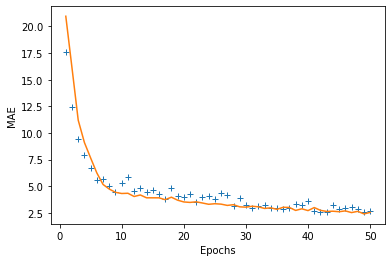

In [12]:
# Esse gráfico mostra o valor da métrica MAE para os dados de validação e treino durante cada época
import matplotlib.pyplot as plt
%matplotlib inline  
plt.plot(range(1, len(val_mae) + 1), val_mae, '+')
plt.plot(range(1, len(train_mae) + 1), train_mae)
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

### Predição 

Depois de treinar seu modelo, você pode usá-lo para fazer previsões sobre dados de teste ou novos dados.

Existem vários tipos de saída diferentes que você pode calcular a partir de seu modelo treinado, cada um calculado usando uma chamada de função diferente em seu objeto de modelo. Por exemplo:

* model.evaluate(): Para calcular os valores de perda dos dados de entrada.

* model.predict(): Para gerar saída de rede para dados de entrada.

* model.predict_classes(): Para gerar saídas de classe para dados de entrada.

* model.predict_proba(): Para gerar probabilidades de classe para dados de entrada.

### Aqui temos as metricas

In [13]:
## Evaluate
test_data = scalar.transform(test_data)
test_mse_score, test_mae_score, test_accuracy_score = model.evaluate(test_data, test_targets)
print("MSE: ", test_mse_score)
print("MAE: ",test_mae_score)
print("Accuracy",test_accuracy_score)

102/102 [==============================] - 0s 0us/step
MSE:  29.47265505323223
MAE:  3.891822576522827
Accuracy 0.019607843831181526


In [14]:
prediction = model.predict(test_data)

In [15]:
prediction[:10]

array([[ 5.9473963],
       [19.329315 ],
       [19.116886 ],
       [38.164894 ],
       [22.547157 ],
       [18.334003 ],
       [23.962719 ],
       [18.448498 ],
       [21.274872 ],
       [22.259464 ]], dtype=float32)

In [17]:
test_targets[:10]

array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2])

Referências: 

* Machine Learning Mastery, https://machinelearningmastery.com/deep-learning-with-python/

* Deep Learning with Python, François Chollet